# **Загрузка библиотек**

In [ ]:
import pandas as pd
import math
from math import log10
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Предобработка датасетов с целевой переменной**

In [ ]:
df1 = pd.read_excel('multi-target data set.xlsx')
df1

,Molecular Formula,String,CMC (mM),Γm (x10^10 mol/cm2),Name,Molecular Weight,Temperature,Class,train/test,CMC_DOI,SEC_DOI
0,C3H8O2,CC(CO)O,1090.00000,NaN,"1,2-propanediol",76.09,23,Nonionic,train,https://doi.org/10.1248/cpb.10.771,NaN
1,C3H8O2,C(CO)CO,1110.00000,NaN,"1,3-Propanediol",76.09,21.5,Nonionic,train,https://doi.org/10.1248/cpb.10.771,NaN
2,C4H10O2,CCC(CO)O,550.00000,NaN,"1,2-BUTANEDIOL",90.12,22,Nonionic,train,https://doi.org/10.1248/cpb.10.771,NaN
3,C4H10O2,CC(CCO)O,530.00000,NaN,"1,3-BUTANEDIOL",90.12,21.5,Nonionic,test,https://doi.org/10.1248/cpb.10.771,NaN
4,C4H10O2,C(CCO)CO,580.00000,NaN,"1,4-Butanediol",90.12,22,Nonionic,train,https://doi.org/10.1248/cpb.10.771,NaN
...,...,...,...,...,...,...,...,...,...,...,...
447,C17H23F12NO4,C(CCCNC(=O)OCCOCCOCCC)(C(C(C(C(C(F)(F)F)(F)F)(...,0.08995,NaN,NaN,533.34,25,Nonionic,train,https://doi.org/10.1021/ie4016232,NaN
448,C19H22F17NO4,C(CCCNC(=O)OCCOCCOCCC)(C(C(C(C(C(C(C(F)(F)F)(F...,0.01099,NaN,NaN,651.35,25,Nonionic,train,https://doi.org/10.1021/ie4016232,NaN
449,C18H25F13O4S2,C(CSCCOCCSCCOCCOCCO)C(C(C(C(C(C(F)(F)F)(F)F)(F...,2.30000,4.23,NaN,616.49,25,Nonionic,train,https://doi.org/10.1016/0021-9797(89)90348-2,https://doi.org/10.1016/0021-9797(89)90348-2
450,C20H29F13O5S2,C(CSCCOCCOCCSCCOCCOCCO)C(C(C(C(C(C(F)(F)F)(F)F...,2.60000,3.93,NaN,660.55,25,Nonionic,train,https://doi.org/10.1016/0021-9797(89)90348-2,https://doi.org/10.1016/0021-9797(89)90348-2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Molecular Formula    452 non-null    object 
 1   String               452 non-null    object 
 2   CMC (mM)             429 non-null    float64
 3   Γm (x10^10 mol/cm2)  164 non-null    float64
 4   Name                 327 non-null    object 
 5   Molecular Weight     452 non-null    float64
 6   Temperature          452 non-null    object 
 7   Class                452 non-null    object 
 8   train/test           452 non-null    object 
 9   CMC_DOI              429 non-null    object 
 10  SEC_DOI              164 non-null    object 
dtypes: float64(3), object(8)
memory usage: 39.0+ KB


Удаление ненужных колонок, перевод значений температуры к единому формату и типу данных:

In [ ]:
df1 = df1.drop(columns=['train/test','CMC_DOI','SEC_DOI', 'Molecular Weight','Name', 'Γm (x10^10 mol/cm2)'], axis=1)
df1['Temperature'] = df1['Temperature'].replace('RT', 20)
df1['Temperature'] = df1['Temperature'].astype(float)

Перевод целевой величины к единой величине (моль/л) и расчет ее показателя для рассмотрения распределения:

In [ ]:
df1 = df1.dropna(subset=['CMC (mM)'])
df1['CMC'] = df1['CMC (mM)'].apply(lambda x: x/1000)
df1['pCMC'] = df1['CMC (mM)'].apply(lambda x: -log10(x))
pd.set_option('display.float_format', '{:.2f}'.format)
df1

,Molecular Formula,String,CMC (mM),Temperature,Class,CMC,pCMC
0,C3H8O2,CC(CO)O,1090.00,23.00,Nonionic,1.09,-3.04
1,C3H8O2,C(CO)CO,1110.00,21.50,Nonionic,1.11,-3.05
2,C4H10O2,CCC(CO)O,550.00,22.00,Nonionic,0.55,-2.74
3,C4H10O2,CC(CCO)O,530.00,21.50,Nonionic,0.53,-2.72
4,C4H10O2,C(CCO)CO,580.00,22.00,Nonionic,0.58,-2.76
...,...,...,...,...,...,...,...
447,C17H23F12NO4,C(CCCNC(=O)OCCOCCOCCC)(C(C(C(C(C(F)(F)F)(F)F)(...,0.09,25.00,Nonionic,0.00,1.05
448,C19H22F17NO4,C(CCCNC(=O)OCCOCCOCCC)(C(C(C(C(C(C(C(F)(F)F)(F...,0.01,25.00,Nonionic,0.00,1.96
449,C18H25F13O4S2,C(CSCCOCCSCCOCCOCCO)C(C(C(C(C(C(F)(F)F)(F)F)(F...,2.30,25.00,Nonionic,0.00,-0.36
450,C20H29F13O5S2,C(CSCCOCCOCCSCCOCCOCCO)C(C(C(C(C(C(F)(F)F)(F)F...,2.60,25.00,Nonionic,0.00,-0.41


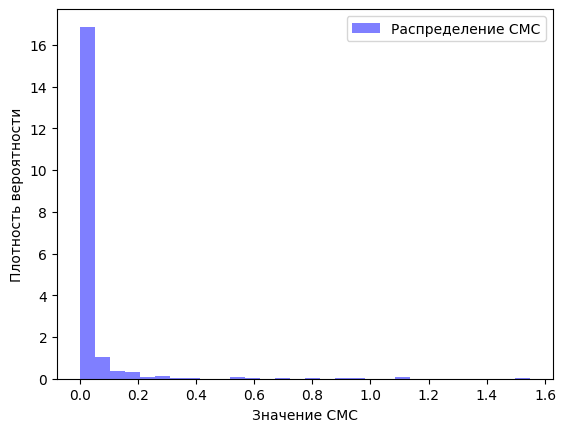

In [ ]:
plt.hist(df1['CMC'], bins=30, density=True, alpha=0.5, label='Распределение CMC', color='blue')

plt.title('')
plt.xlabel('Значение CMC')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()

Логарифмическое распределение данных целевой величины, поэтому рассчитываем показатель концентрации мицеллообразования.

In [ ]:
df2 = pd.read_csv('cmm.csv')
df2 = df2.rename(columns={'smiles': 'String','category': 'Class','T': 'Temperature'})
df2['Class'] = df2['Class'].apply(lambda x: x.capitalize())
pd.set_option('display.float_format', '{:.4f}'.format)
df2

,String,pCMC,Temperature,Class
0,CCCCCCOS(=O)(=O)[O-].[Na+],0.3640,40,Anionic
1,CCCCCCCOS(=O)(=O)[O-].[Na+],0.6450,40,Anionic
2,CCCCCCCCCOS(=O)(=O)[O-].[Na+],1.2090,40,Anionic
3,O=C(CCCCCCCC)[O-].[K+],0.3330,40,Anionic
4,O=C(CCCCCCCCCC)[O-].[K+],0.9360,40,Anionic
...,...,...,...,...
774,OC(COCCCCCCCCCC)C(O)C(O)CO,3.0915,25,Nonionic
775,CCCCCCCCO[C@@H]([C@H](O)[C@@H](CO)OC1O)[C@H]1O,2.9208,25,Nonionic
776,CCCCCCCCCCO[C@@H]([C@H](O)[C@@H](CO)OC1O)[C@H]1O,3.1079,25,Nonionic
777,CCCCCCCCCCCCO[C@@H]([C@H](O)[C@@H](CO)OC1O)[C@...,3.6383,25,Nonionic


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   String       779 non-null    object 
 1   pCMC         779 non-null    float64
 2   Temperature  779 non-null    int64  
 3   Class        779 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 24.5+ KB


In [ ]:
df2['Temperature'] = df2['Temperature'].astype(float)
df2['CMC'] = df2['pCMC'].apply(lambda x: 10**(-x))
df2

,String,pCMC,Temperature,Class,CMC
0,CCCCCCOS(=O)(=O)[O-].[Na+],0.3640,40.0000,Anionic,0.4325
1,CCCCCCCOS(=O)(=O)[O-].[Na+],0.6450,40.0000,Anionic,0.2265
2,CCCCCCCCCOS(=O)(=O)[O-].[Na+],1.2090,40.0000,Anionic,0.0618
3,O=C(CCCCCCCC)[O-].[K+],0.3330,40.0000,Anionic,0.4645
4,O=C(CCCCCCCCCC)[O-].[K+],0.9360,40.0000,Anionic,0.1159
...,...,...,...,...,...
774,OC(COCCCCCCCCCC)C(O)C(O)CO,3.0915,25.0000,Nonionic,0.0008
775,CCCCCCCCO[C@@H]([C@H](O)[C@@H](CO)OC1O)[C@H]1O,2.9208,25.0000,Nonionic,0.0012
776,CCCCCCCCCCO[C@@H]([C@H](O)[C@@H](CO)OC1O)[C@H]1O,3.1079,25.0000,Nonionic,0.0008
777,CCCCCCCCCCCCO[C@@H]([C@H](O)[C@@H](CO)OC1O)[C@...,3.6383,25.0000,Nonionic,0.0002


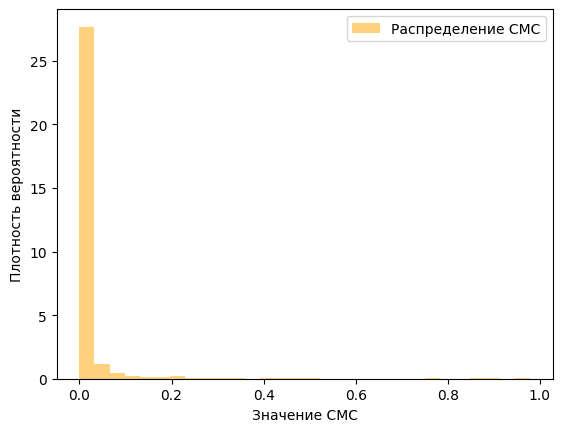

In [ ]:
plt.hist(df2['CMC'], bins=30, density=True, alpha=0.5, label='Распределение CMC', color='orange')

plt.title('')
plt.xlabel('Значение CMC')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()

In [ ]:
df3 = pd.read_excel('testset.xlsx')
df3

,String,log CMC (uM),T_C,T_K,Class
0,CCCCCCCCCCCCCCCCCC(=O)[O-].[Na+],3.2553,30.0000,303.1500,Anionic
1,CCCCCCCCCCCCCCCCCC(=O)[O-].[Na+],3.2553,50.0000,323.1500,Anionic
2,CCCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)...,3.3820,15.0000,288.1500,Nonionic
3,CCCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)...,3.3424,25.0000,298.1500,Nonionic
4,CCCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)...,3.3118,35.0000,308.1500,Nonionic
...,...,...,...,...,...
213,CCCCCCCCCCCCCC[N+](CC)(CC)CC.[Br-],3.4914,25.0000,298.1500,Cationic
214,CCCCCCCCCCCC(=O)N(C)CC(O)CO,2.3692,25.0000,298.1500,Nonionic
215,CCCCCCCCCC[N+](C)(C)[O-],4.1761,27.0000,300.1500,Cationic
216,C(CCO)CO,5.7634,22.0000,295.1500,Nonionic


In [ ]:
df3 = df3.rename(columns={'T_C': 'Temperature'})
df3['CMC'] = df3['log CMC (uM)'].apply(lambda x: (10**(x))/1000000)
df3['pCMC'] = df3['CMC'].apply(lambda x: -log10(x))
pd.set_option('display.float_format', '{:.2f}'.format)
df3

,String,log CMC (uM),Temperature,T_K,Class,CMC,pCMC
0,CCCCCCCCCCCCCCCCCC(=O)[O-].[Na+],3.26,30.00,303.15,Anionic,0.00,2.74
1,CCCCCCCCCCCCCCCCCC(=O)[O-].[Na+],3.26,50.00,323.15,Anionic,0.00,2.74
2,CCCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)...,3.38,15.00,288.15,Nonionic,0.00,2.62
3,CCCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)...,3.34,25.00,298.15,Nonionic,0.00,2.66
4,CCCCCCCCCCO[C@H]1[C@@H]([C@H]([C@@H]([C@H](O1)...,3.31,35.00,308.15,Nonionic,0.00,2.69
...,...,...,...,...,...,...,...
213,CCCCCCCCCCCCCC[N+](CC)(CC)CC.[Br-],3.49,25.00,298.15,Cationic,0.00,2.51
214,CCCCCCCCCCCC(=O)N(C)CC(O)CO,2.37,25.00,298.15,Nonionic,0.00,3.63
215,CCCCCCCCCC[N+](C)(C)[O-],4.18,27.00,300.15,Cationic,0.02,1.82
216,C(CCO)CO,5.76,22.00,295.15,Nonionic,0.58,0.24


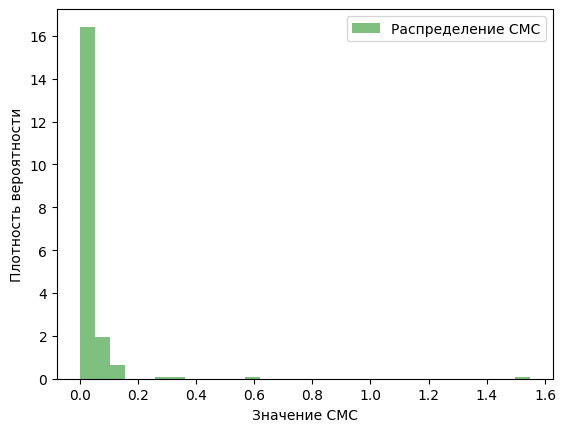

In [ ]:
plt.hist(df3['CMC'], bins=30, density=True, alpha=0.5, label='Распределение CMC', color='green')

plt.title('')
plt.xlabel('Значение CMC')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()

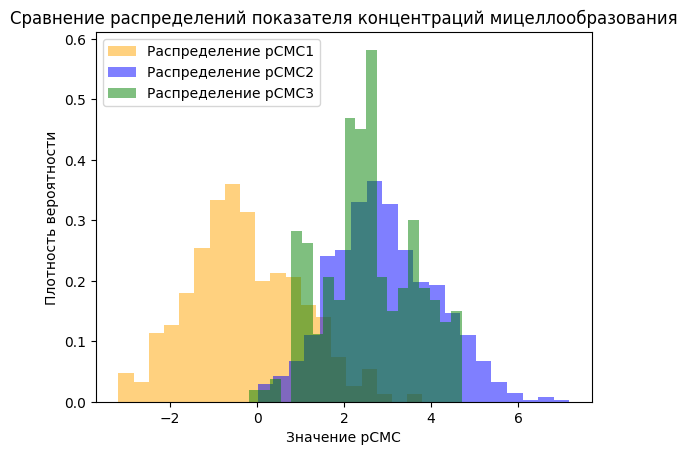

In [ ]:
plt.hist(df1['pCMC'], bins=20, density=True, alpha=0.5, label='Распределение pCMC1', color='orange')
plt.hist(df2['pCMC'], bins=20, density=True, alpha=0.5, label='Распределение pCMC2', color='blue')
plt.hist(df3['pCMC'], bins=20, density=True, alpha=0.5, label='Распределение pCMC3', color='green')

plt.title('Сравнение распределений показателя концентраций мицеллообразования')
plt.xlabel('Значение pCMC')
plt.ylabel('Плотность вероятности')
plt.legend()

plt.show()

Можно заметить, что распределение величины pCMC в каждом из df приблизилось к нормальному, но общее распределение на него не похоже.

Объединение в один датафрейм

In [ ]:
df = pd.concat([df1[['String','CMC','pCMC','Temperature','Class']],
                df2[['String','CMC','pCMC','Temperature','Class']],
                df3[['String','CMC','pCMC','Temperature','Class']]], axis=0, ignore_index=True)
df

,String,CMC,pCMC,Temperature,Class
0,CC(CO)O,1.09,-3.04,23.00,Nonionic
1,C(CO)CO,1.11,-3.05,21.50,Nonionic
2,CCC(CO)O,0.55,-2.74,22.00,Nonionic
3,CC(CCO)O,0.53,-2.72,21.50,Nonionic
4,C(CCO)CO,0.58,-2.76,22.00,Nonionic
...,...,...,...,...,...
1421,CCCCCCCCCCCCCC[N+](CC)(CC)CC.[Br-],0.00,2.51,25.00,Cationic
1422,CCCCCCCCCCCC(=O)N(C)CC(O)CO,0.00,3.63,25.00,Nonionic
1423,CCCCCCCCCC[N+](C)(C)[O-],0.02,1.82,27.00,Cationic
1424,C(CCO)CO,0.58,0.24,22.00,Nonionic


Избавимся от дубликатов в данных экспериментов определения свойства, содержащих одинаковые молекулы и измеренные при одинаковой температуре.

In [ ]:
df = df.drop_duplicates(subset=['String', 'Temperature'], ignore_index=True)
df.shape

(1267, 5)

Сохраняем общий результат предобработки.

In [ ]:
df.to_csv('UnitedData.csv', index=False)